In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('height-weight.csv')

In [5]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


Text(0, 0.5, 'Height')

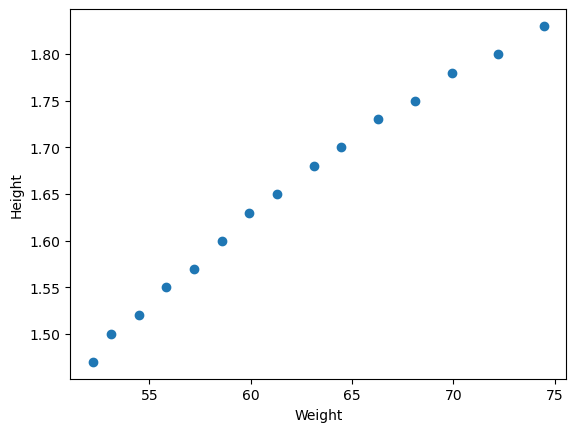

In [8]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [9]:
##correlation
df.corr()

,Height,Weight
Height,1.000000,0.994584
Weight,0.994584,1.000000


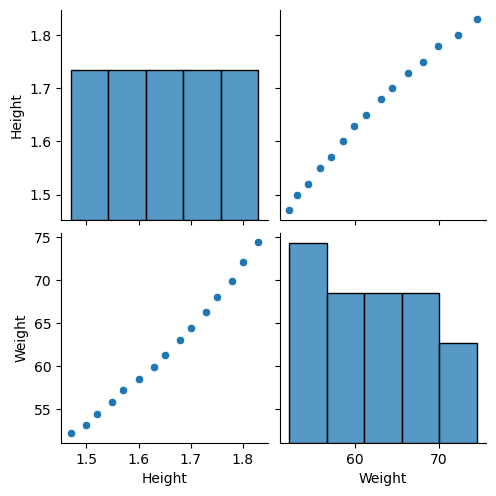

In [11]:
import seaborn as sns
sns.pairplot(df)

In [17]:
#liner regration
#independent and independebt feature
X=df[['Weight']]#independet feature should be in Dataframe or 2-d array
# np.array(X).shape
y=df['Height']#can be in series and single dimention

In [18]:
#train Test Spilt
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [20]:
X_train.shape

(11, 1)

In [21]:
#standardization
from sklearn.preprocessing import StandardScaler


In [24]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [25]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.49985914],
       [ 1.07061624],
       [-1.42782185],
       [ 1.71370068]])

In [26]:
#apply simple liner regression
from sklearn.linear_model import LinearRegression

In [30]:
regression=LinearRegression(n_jobs=-1)

In [31]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [34]:
print("cofficient or slop:",regression.coef_)
print("Intercet:",regression.intercept_)

cofficient or slop: [0.10138121]
Intercet: 1.6399999999999997


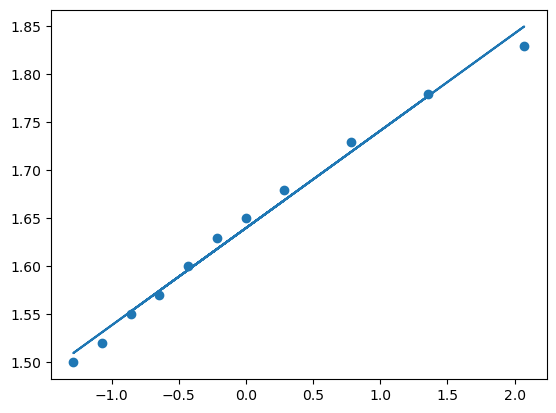

In [36]:
#plot Traning data with best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [37]:
#prediction for test data
y_pred=regression.predict(X_test)

In [39]:
#performance
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [40]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.00022877823247598116
0.012441511361401869
0.015125416770323427


In [43]:
#r squred and absolute r squred
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9856565371488413

In [44]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9784848057232619

In [46]:
##ols
import statsmodels.api as sm

In [47]:
model=sm.OLS(y_train,X_train).fit()


In [48]:
prediction=model.predict(X_test)
prediction

array([ 0.05067633,  0.10854037, -0.14475431,  0.17373705])

In [49]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.096
Method:                 Least Squares   F-statistic:                            0.03821
Date:                Fri, 26 Jul 2024   Prob (F-statistic):                       0.849
Time:                        21:34:03   Log-Likelihood:                         -21.050
No. Observations:                  11   AIC:                                      44.10
Df Residuals:                      10   BIC:                                      44.50
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Acer\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [52]:
#prediction for new data
regression.predict(scaler.transform([[60]]))

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1.61942225])